In [191]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as time 

# trials is for number of time experiment repeated
# srf - sampling rate factor

In [192]:
trials = 10
srf = 10
img = cv2.imread("C:/Users/qa284/Downloads/im.jpg") 

# Simple down-sampling method

In [193]:
def simple_downsmpl(img ,srf):
    im_array = np.array(img)
    im_downsampled = im_array[::srf, ::srf, :]
    return im_downsampled

# Nearest neighbour interpolation method

In [194]:
def NNIp(img,srf):
    height, width, channels = img.shape
    new_height = int(height * srf)
    new_width = int(width * srf)
    new_img = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_NEAREST)
    return new_img

# Bilinear interpolation method

In [195]:
def BLIp(img,srf):
    height, width, channels = img.shape
    new_height = int(height * srf)
    new_width = int(width * srf)
    new_img = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_LINEAR)
    return new_img

# Bicubic interpolation method

In [196]:
def BCIp(img,srf):
    height, width, channels = img.shape
    new_height = int(height * srf)
    new_width = int(width * srf)
    new_img = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_CUBIC)
    return new_img

# Time sampling for Nearest neighbour interpolation method

In [197]:
NNIp_time=[]
for i in range(trials):
    start = time()
    down_sampled_img = simple_downsmpl(img ,srf)
    up_sampled_img = NNIp(img,srf)
    end = time()
    elpsd_time =end - start
    NNIp_time.append(elpsd_time)

# Time sampling for Bilinear interpolation method

In [198]:
BLIp_time=[]
for i in range(trials):
    start = time()
    down_sampled_img = simple_downsmpl(img ,srf)
    up_sampled_img = BLIp(img,srf)
    end = time()
    elpsd_time =end - start
    BLIp_time.append(elpsd_time)

# Time sampling for Bicubic interpolation method

In [199]:
BCIp_time=[]
for i in range(trials):
    start = time()
    down_sampled_img = simple_downsmpl(img ,srf)
    up_sampled_img = BCIp(img,srf)
    end = time()
    elpsd_time =end - start
    BCIp_time.append(elpsd_time)

# X-axis

In [200]:
no_of_trials = []
for i in range(len(BCIp_time)):
    no_of_trials.append(i+1)

# plots

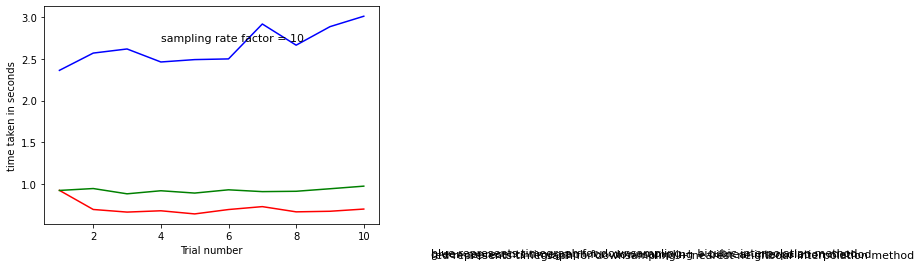

In [201]:
plt.plot(no_of_trials , NNIp_time,color="red")
plt.plot(no_of_trials , BLIp_time, color="green")
plt.plot(no_of_trials , BCIp_time, color="blue")
plt.ylabel("time taken in seconds")
plt.xlabel("Trial number")
plt.text(4,2.72, "sampling rate factor = " + str(srf), fontsize = 11)
plt.text(12,0.11, "red represents timegraph for downsampling + nearest neighbour interpolation method", fontsize = 11)
plt.text(12,0.12, "green represents timegraph for  downsampling + bilinear interpolation method", fontsize = 11)
plt.text(12,0.13, "blue represents timegraph for downsampling + bicubic interpolation method", fontsize = 11)
plt.show()

# Saving resulting images

In [202]:
down_sampled_img = simple_downsmpl(img ,srf)
cv2.imwrite("C:/Users/qa284/Downloads/exp2/downsampling/ds.jpg", down_sampled_img)
up_sampled_img1 = NNIp(img,srf)
up_sampled_img2 = BLIp(img,srf)
up_sampled_img3 = BCIp(img,srf)
cv2.imwrite("C:/Users/qa284/Downloads/exp2/up1/up1.jpg", up_sampled_img1) # save image
cv2.imwrite("C:/Users/qa284/Downloads/exp2/up2/up2.jpg", up_sampled_img2) # save image
cv2.imwrite("C:/Users/qa284/Downloads/exp2/up3/up3.jpg", up_sampled_img3) # save image

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\alloc.cpp:73: error: (-4:Insufficient memory) Failed to allocate 3079803600 bytes in function 'cv::OutOfMemoryError'
